In [1]:
%pylab inline
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix

Populating the interactive namespace from numpy and matplotlib


In [2]:
#full_df = pd.read_csv('full_ML_data.csv', index_col=0)
full_df = pd.read_csv('full_df_correct.csv', index_col=0)
full_df = full_df[full_df.flux_75.notnull()]

df_shuffle = full_df.sample(frac = 1)

train_len = int(0.6*len(full_df))
val_len = int(0.8*len(full_df))

gal_train, gal_val, gal_test = df_shuffle[0:train_len], df_shuffle[train_len:val_len], df_shuffle[val_len:]

In [3]:
print(np.allclose(full_df['W80_75'],full_df['W80_25']))

False


X_train = gal_train.drop(['is_AGN','galaxy_id'],axis=1)
Y_train = gal_train['is_AGN']
X_val = gal_val.drop(['is_AGN','galaxy_id'],axis=1).copy()
Y_val = gal_val['is_AGN']

In [4]:
X_train = gal_train.drop(['is_AGN','galaxy_id','mean_gauss'],axis=1)
Y_train = gal_train['is_AGN']
X_val = gal_val.drop(['is_AGN','galaxy_id','mean_gauss'],axis=1).copy()
Y_val = gal_val['is_AGN']

In [5]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_val)
acc_log = round(logreg.score(X_val, Y_val) * 100, 2)
print(acc_log)
print(1 - sum(abs(Y_val-Y_pred))/len(gal_val))

88.32
0.8832116788321168


In [6]:
X_train.columns

Index(['flux_75', 'flux_25', 'vmed_75', 'vmed_25', 'W80_75', 'W80_25',
       'lum_25', 'lum_75'],
      dtype='object')

In [7]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,flux_25,0.149233
7,lum_75,0.096220
5,W80_25,0.004819
2,vmed_75,0.003489
4,W80_75,-0.000748
3,vmed_25,-0.001254
0,flux_75,-0.029918
6,lum_25,-0.056586


In [8]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_val)
acc_svc = round(svc.score(X_val, Y_val) * 100, 2)
print(acc_svc)
print(1 - sum(abs(Y_val-Y_pred))/len(gal_val))

88.5
0.885036496350365


In [9]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_val)
acc_knn = round(knn.score(X_val, Y_val) * 100, 2)
print(acc_knn)
print(1 - sum(abs(Y_val-Y_pred))/len(gal_val))

88.5
0.885036496350365


In [10]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_val)
acc_gaussian = round(gaussian.score(X_val, Y_val) * 100, 2)
print(acc_gaussian)
print(1 - sum(abs(Y_val-Y_pred))/len(gal_val))

83.21
0.8321167883211679


In [11]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_val)
acc_perceptron = round(perceptron.score(X_val, Y_val) * 100, 2)
print(acc_perceptron)
print(1 - sum(abs(Y_val-Y_pred))/len(gal_val))

85.4
0.8540145985401459


/Users/anthonyflores/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [12]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_val)
acc_linear_svc = round(linear_svc.score(X_val, Y_val) * 100, 2)
print(acc_linear_svc)
print(1 - sum(abs(Y_val-Y_pred))/len(gal_val))

88.5
0.885036496350365


In [13]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_val)
acc_sgd = round(sgd.score(X_val, Y_val) * 100, 2)
print(acc_sgd)
print(1 - sum(abs(Y_val-Y_pred))/len(gal_val))

88.32
0.8832116788321168


/Users/anthonyflores/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [14]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_val)
acc_decision_tree = round(decision_tree.score(X_val, Y_val) * 100, 2)
print(acc_decision_tree)
print(1 - sum(abs(Y_val-Y_pred))/len(gal_val))

82.66
0.8266423357664233


In [15]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_val)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_val, Y_val) * 100, 2)
print(acc_random_forest)
print(1 - sum(abs(Y_val-Y_pred))/len(gal_val))

87.59
0.8759124087591241


In [16]:
X_test =gal_test.drop(['is_AGN','galaxy_id','mean_gauss'],axis=1).copy()
Y_test = gal_test['is_AGN']

Y_pred = random_forest.predict(X_test)
print(1 - sum(abs(Y_test-Y_pred))/len(gal_test))
print(len(gal_test) - sum(abs(Y_test-Y_pred)))

0.8759124087591241
480.0


In [17]:
print(X_test.columns)
print(confusion_matrix(Y_test,Y_pred))

Index(['flux_75', 'flux_25', 'vmed_75', 'vmed_25', 'W80_75', 'W80_25',
       'lum_25', 'lum_75'],
      dtype='object')
[[479   3]
 [ 65   1]]


In [18]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    #plt.savefig('lc_logreg_original')
    return plt

In [19]:
full_df = pd.read_csv('full_df_correct.csv', index_col=0)
full_df = full_df[full_df.flux_75.notnull()]
data = full_df.drop(['is_AGN','galaxy_id','mean_gauss'],axis=1)
labels = full_df['is_AGN']

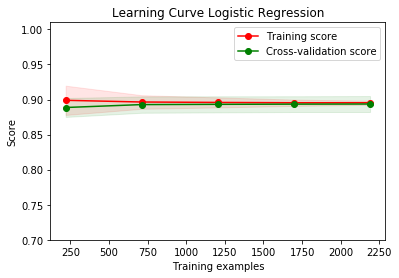

In [20]:
title = 'Learning Curve Logistic Regression'
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, data, labels, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()
#plt.savefig('lc_logreg_original')

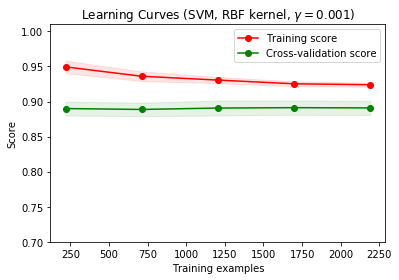

In [21]:
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, data, labels, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()
#plt.savefig("lc_SVC_lum_75s_bad")

title = 'Learning Curve Random Forest (100 trees)'
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(n_estimators=100)
plot_learning_curve(estimator, title, data, labels, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

full_df = pd.read_csv('full_ML_data.csv', index_col=0)
full_df = full_df[full_df.flux_75.notnull()]

full_df.flux_75 /= max(full_df['flux_75'])
full_df.flux_25 /= max(full_df['flux_25'])
full_df.W80_75 /= max(full_df['W80_75'])
full_df.W80_25 /= max(full_df['W80_25'])
full_df.vmed_75 /= max(full_df['vmed_75'])
full_df.vmed_25 /= max(full_df['vmed_25'])
full_df.mean_gauss /= max(full_df['mean_gauss'])

df_shuffle = full_df.sample(frac = 1)

train_len = int(0.6*len(full_df))
val_len = int(0.8*len(full_df))

gal_train, gal_val, gal_test = df_shuffle[0:train_len], df_shuffle[train_len:val_len], df_shuffle[val_len:]